## 설명해야 할것
* what kind of feature
* labels
* how many samples, features
* EDA
* Discuss what kind of problems can be addressed using the dataset

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
import graphviz
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import seaborn as sns
clf=CatBoostClassifier(iterations=2500,loss_function='Logloss',depth=8,eval_metric='TotalF1',task_type='CPU',leaf_estimation_iterations=10,use_best_model=False)

df1=pd.read_csv("bank.csv",sep=';',index_col=False)
df1.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


내가 조사 할 첫번째 자료는 UCI Data Repossitory에서 추출한 Bank Marketing Data Set이다. 이 데이터는 포루투갈 은행의 마켓팅에 대한 고객들의 정기 예금 신청여부를 측정한 데이터셋이다. 우선 어떤 feature들이 있는지 살펴보자.(참고로 파일을 download했을때 2가지버전은 bank.csv 파일이 있었다. 하나는 bank-full.csv 였고 다른하나는 bank.csv였다. bank.csv는 bank-full.csv의 10%인 데이터만 들어 있었다. 4521개의 데이터양도 충분하다고 생각했기 때문에 굳이 bank-full데이터를 다루지 않았다.)
feature
1.age:나이를 나타낸 값이다.
2.job:(직업종류):admin,unknown,unemployed,student,technician,entrepreneur,management,housemaid,services,blue-collar,self-employed,retired
3.martial(결혼상태):married,divorecd,single
4.education:교육상태 unknown,secondary,primary,tertiary
5.default(신용카드유무):yes,no
6.balance:(연간 평균잔액):numeric
7.housing:주택융자유뮤(yes,no)
8.loan:개인대출 유무: yes,no
9.contact:연락유형을 이야기 한다.(cellular):핸드폰,(telephone):전화기,(unkown):알 수없음
10.day:매월 마지막 연락일(numeric) 
11.month:마직막 연락달(jan,.......,dec)
12.duration:(마지막 연락 기간, 초): 고객과의 마지막으로 연락한 통화시간을 의미한다.
13.campaign:(캠페인 기간 동안 고객에게 연락한 횟수)numeric
14.pdays:(이전의 캠페인으로부터 고객에게 마지막연락한 후 지날날의 수):numeric
15.previous(캠페인 이전의 고객에게 연락한 횟수):numeric
16.poutcome(past-outcome):이전 마케팅 캠페인의 결과 :'unknown','other','failure','success'

label:
y:정기예금 신청여부,'Yes','No'



샘플의 갯수로는 4521 rows × 17 columns가 있다. 아까 위에서 설명한대로 bank-full.csv는 이 데이터의 10배인 46000개의 데이터셋이 들어있다. EDA의 시간등을 고려해볼때 4521개의 데이터양도 충분하다고 생각했다. 

EDA

featured The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

이 데이터셋으로 해결 할 수 있는 문제는 은행의 시간과 비용감축에 있을 것이다. 은행은 정기예금을 많이 판매하기 위해서 여러 마켓팅을 한다. 그 중 대표적인 예가 이 전화 마켓팅인데 여기에 소요되는 비용과 시간의 양이 상당하다. 이를 줄이기 위해 고객의 직업종류,결혼상태,대출유무 들의 특징을 고려한 상관관계를 분석하면 마켓팅을 하는데 소비하는 여러 자원들을 감축시켜 은행에게 더 많은 이윤을 추구하게 도와줄 것이다.

In [328]:
df1.isnull().sum()
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [165]:
ndata=df1.to_numpy(dtype=np.dtype)
for i in range(4521):
    if ndata[i,16]=='no':
        ndata[i,16]=0
    else:
        ndata[i,16]=1
        
for i in range(4521):
    if ndata[i,4]=='no':
        ndata[i,4]=0
    else:
        ndata[i,4]=1

for i in range(4521):
    if ndata[i,6]=='no':
        ndata[i,6]=0
    else:
        ndata[i,6]=1
        
for i in range(4521):
    if ndata[i,7]=='no':
        ndata[i,7]=0
    else:
        ndata[i,7]=1

a=ndata[:,16]
print(a)


[1 1 1 ... 1 1 1]


In [171]:


df1=pd.get_dummies(df1)
collist=[]
collist=df1.columns.tolist()
na=df1.to_numpy(dtype=np.dtype)
df1.shape


(4521, 53)

In [174]:
X=na[:,:51]
tree=DecisionTreeClassifier(max_depth=4,random_state=0)
print(na[:,51:52])


[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [117]:
y

array([['no'],
       ['no'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [38]:
c.dtype

dtype('int64')

In [320]:
df3=pd.read_csv("adult.csv",names=['Age','Workclass','fnlwgt','Education'
                                  ,'Education-num','marital-status','occupation','relationship','race','sex'
                                  ,'capital-gain','capital-loss','hours-per-week','native-country','Target'])
df3

,Age,Workclass,fnlwgt,Education,Education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [322]:
df3.shape
df3.describe()

,Age,fnlwgt,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [324]:
df3.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Target            0
dtype: int64

이 데이터는 Wisconsin Breast Cancer Database 이다.
샘플과 feature의 갯수는 각각 699개와 11개이다. feature들을 차례대로 이야기 하면 
Sample code number':샘플 코드 숫자 즉 id라고 생각하면 된다.
'Clump Thickness' :뭉툭한 두께 정도 (numeric)        
'Uniformity of Cell Size':세포크기의 균일성       
,'Uniformity of Cell Shape':세포 모양의 균일성    
,'Marginal Adhesion':한계 접착력          
,'Single Epithelial Cell Size':단일 상피 세포 크기   
,'Bare Nuclei' :순핵               
,'Bland Chromatin' :염색질의 단조정도              
,'Normal Nucleoli' 핵소체              
,'Mitoses':유사 분열                      
,'Class: 2양성 4악성
이렇게 된다.


In [248]:
np2=np2[:,1:]

In [252]:
data_np2=np2[:,:9].as
data_np2.dtype

dtype('O')

In [250]:
label_np2=np2[:,9:]

In [314]:
df=pd.read_csv("data.csv")
df=df.drop(['Unnamed: 32'],axis=1)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [295]:
df.shape

(569, 32)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

AttributeError: 'NoneType' object has no attribute 'Column'

In [297]:
df.columns
print(df.diagnosis)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


위 데이터는 kaggle에서 다운 받은 데이터 셋이다. 
샘플수와 feature수는 각각 (569, 33) 이다. 
feature를 살펴보자 
id:각 환자들에게 부여되는 고유 ID값이다.
diagnosis: M은 악성이고 B는 양성이다. 이 데이터셋은 target값이 되겠다.
radius_mean:반지름의 평균값이다.
Texture:_mean:회색질의 표준편차값이다.
perimeter_mean:둘레의 평균값이다.
area_mean:넓이의 평균값이다.
smoothness_mean:반지름의 지역 분산값의 평균이다.
compactness_mean: perimeter^2 / area - 1.0 의 평균값이다.
concavity_mean:윤곽의 오목한 부분의 심각성에 대한 평균
concave points_mean:등고선의 오목한부분 수의 평균이다.
symmetry_mean: 대칭의 평균이다.
fractal_dimension_mean:  "해상도근사-1 의평균
radius_se:반지름의 표준편차값이다.
texture_sestandard error for standard deviation of gray-scale values
perimeter_se
area_se
smoothness_sestandard error for local variation in radius lengths
compactness_sestandard error for perimeter^2 / area - 1.0
concavity_sestandard error for severity of concave portions of the contour
concave points_sestandard error for number of concave portions of the contour
symmetry_se
fractal_dimension_sestandard error for "coastline approximation" - 1
radius_worst"worst" or largest mean value for mean of distances from center to points on the perimeter
texture_worst"worst" or largest mean value for standard deviation of gray-scale values
perimeter_worst
area_worst
smoothness_worst"worst" or largest mean value for local variation in radius lengths
compactness_worst"worst" or largest mean value for perimeter^2 / area - 1.0
concavity_worst"worst" or largest mean value for severity of concave portions of the contour
concave points_worst"worst" or largest mean value for number of concave portions of the contour
symmetry_worst
fractal_dimension_worst"worst" or largest mean value for "coastline approximation" - 1

In [298]:
df.isnull().any()
print(df.diagnosis)
print(df.diagnosis)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


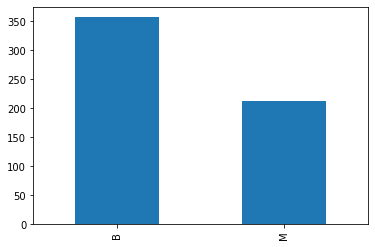

In [299]:
df.diagnosis.value_counts().plot(kind='bar',)
df.diagnosis.value_counts()
print(df.diagnosis)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13a568ad0>,
      dtype=object)

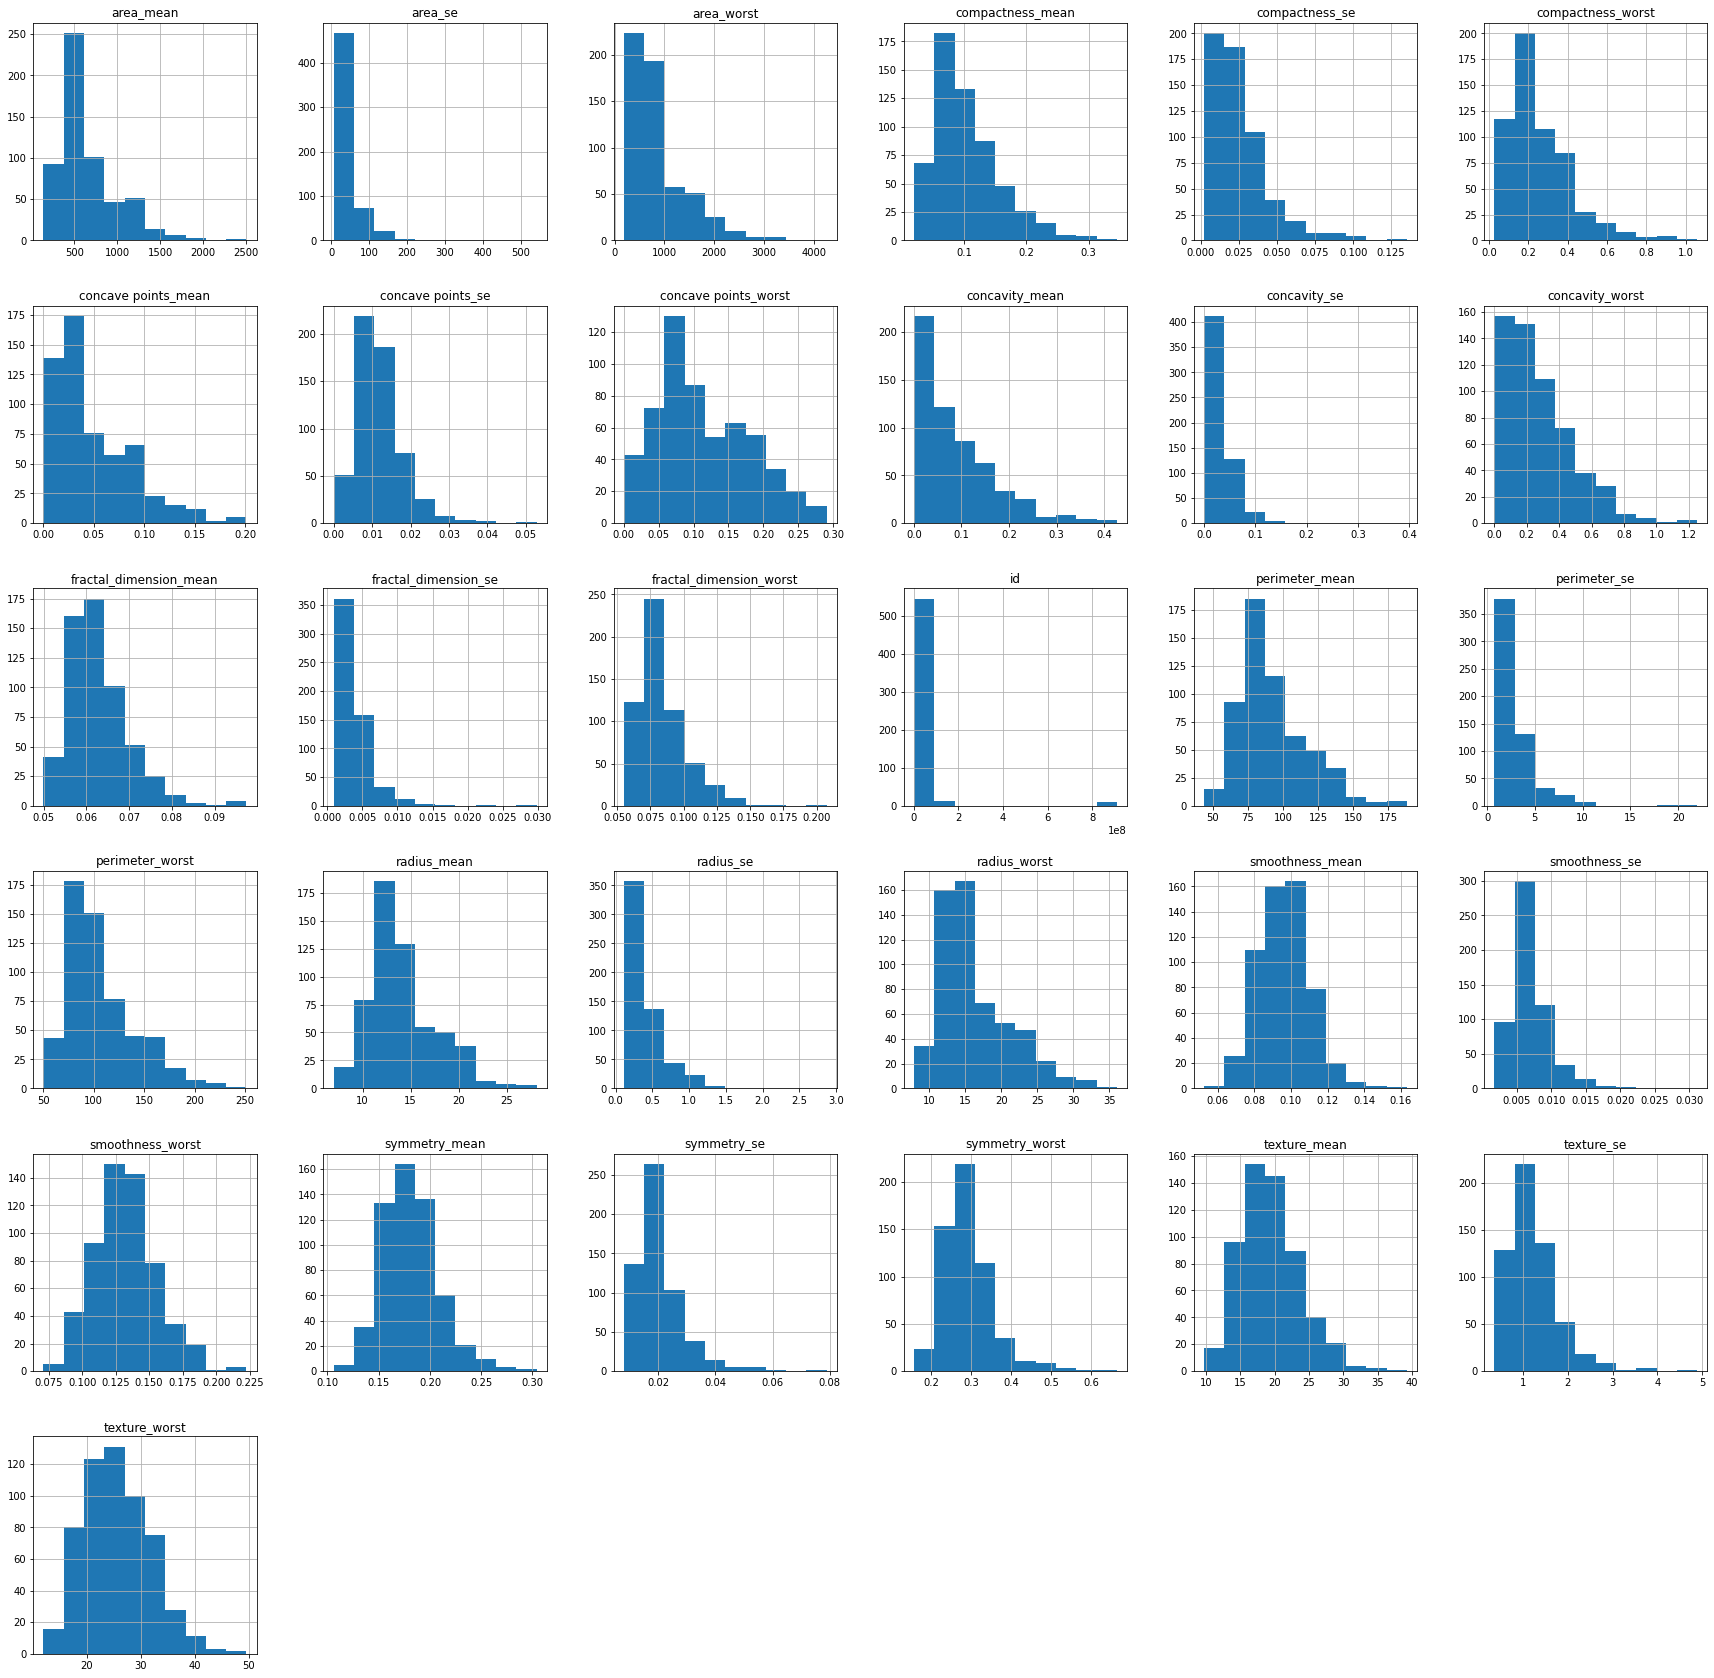

In [315]:
df.hist(bins=10,figsize=(30,30),grid=True)

In [301]:
cancer_mapping={'B':0,'M':1}
print(df.diagnosis)
df.diagnosis=df.diagnosis.map(cancer_mapping)
print(df.diagnosis)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [302]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [307]:
y=df.diagnosis
x=df[['radius_mean',
      'texture_mean','area_mean',
      'smoothness_mean','compactness_mean',
      'concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',
      'radius_se','texture_se','perimeter_se','area_se','smoothness_se',
      'compactness_se','concavity_se','concave points_se','symmetry_se',
      'fractal_dimension_se','radius_worst','texture_worst',
      'perimeter_worst','area_worst','smoothness_worst','compactness_worst'
     ,'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]

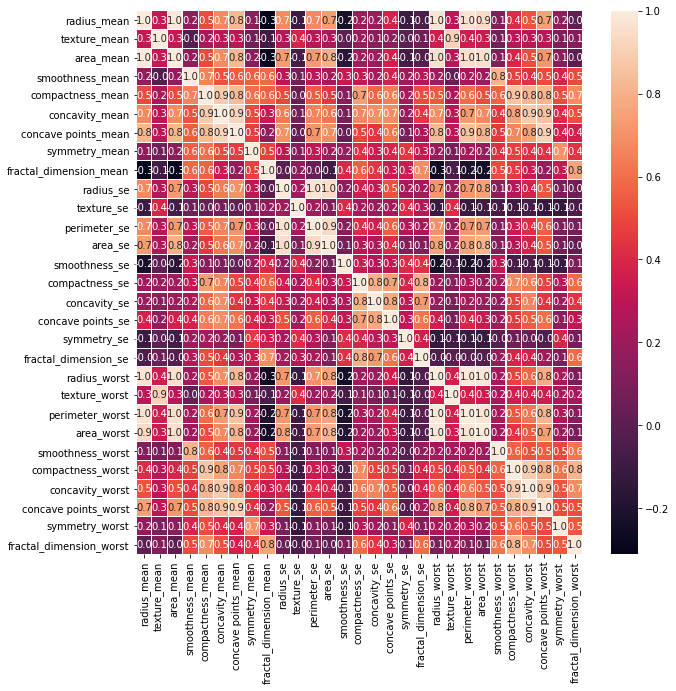

In [313]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(x.corr(),annot=True,linewidths=.05,fmt='.1f',ax=ax)